# Analisis Faktor Penentu Kinerja Akademis Siswa Melalui Pendekatan Klasifikasi Machine Learning

# Pendahuluan
Mengidentifikasi siswa yang berisiko mengalami kegagalan akademis merupakan langkah krusial bagi institusi pendidikan. Machine learning menawarkan pendekatan berbasis data yang kuat untuk memprediksi kinerja siswa secara proaktif.

Proyek ini bertujuan membangun sebuah model klasifikasi dengan memanfaatkan dataset "Student Performance" dari UCI, yang berisi beragam atribut demografis, sosial, dan gaya hidup siswa. Fokus utama analisis adalah untuk memprediksi apakah seorang siswa akan 'Lulus' atau 'Gagal' berdasarkan kombinasi faktor-faktor non-akademis tersebut.

Model yang dihasilkan diharapkan dapat berfungsi sebagai sistem peringatan dini (early warning system) yang efektif, memungkinkan para pendidik untuk memberikan dukungan dan intervensi yang lebih tepat sasaran sebelum akhir tahun ajaran.

# Data Understanding

## Sumber Data
Dataset yang digunakan adalah "Student Performance" yang bersumber dari UCI Machine Learning Repository. Dataset ini dibuat oleh Paulo Cortez dan Alice Silva pada tahun 2008 untuk menganalisis dan memprediksi kinerja akademis siswa sekolah menengah.

- Pemberi Dana & Kreator: Paulo Cortez, University of Minho, Portugal.
- URL: https://archive.ics.uci.edu/dataset/320/student+performance

## Tujuan

Tujuan utama dari analisis ini adalah:

- Tujuan Bisnis: Membangun sebuah model yang dapat mengidentifikasi siswa yang berisiko mengalami kegagalan akademis. Model ini diharapkan dapat menjadi dasar bagi sistem peringatan dini (early warning system) di sekolah untuk memberikan intervensi yang tepat.
  
- Tujuan Teknis: Melakukan klasifikasi biner untuk memprediksi apakah seorang siswa akan "Lulus" atau "Gagal". Target ini akan dibuat dari kolom G3 (nilai akhir), di mana "Lulus" didefinisikan sebagai G3 >= 10 dan "Gagal" sebagai G3 < 10

## Integrasi Data

Dengan menggunakan package `ucimlrepo`, kita tidak perlu menggabungkan file CSV secara manual. Package ini akan mengambil data yang sudah dikombinasikan (kedua mata pelajaran) oleh UCI. Prosesnya menjadi pengambilan data, bukan penggabungan manual.

In [45]:
%pip install numpy ucimlrepo seaborn matplotlib -q


Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import numpy as np

# Atur style visualisasi
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [47]:
# Mengambil dataset dari UCI repository menggunakan ID-nya
student_performance = fetch_ucirepo(id=320)

# Data tersimpan dalam bentuk dictionary-like object
# Fitur (X) dan target (y) terpisah, kita akan menggabungkannya menjadi satu DataFrame
X = student_performance.data.features
y = student_performance.data.targets

# Menggabungkan fitur dan target menjadi satu DataFrame tunggal
df = pd.concat([X, y], axis=1)

print("Dataset berhasil diambil dan digabungkan.")
print(f"Ukuran dataset awal dari UCI: {df.shape}")


Dataset berhasil diambil dan digabungkan.
Ukuran dataset awal dari UCI: (649, 33)


Meskipun data sudah digabungkan, kemungkinan masih ada siswa yang datanya tercatat dua kali (satu untuk Matematika, satu untuk B. Portugis di dataset aslinya). Kita tetap perlu melakukan de-duplikasi berdasarkan atribut personal siswa untuk memastikan setiap siswa hanya diwakili oleh satu baris data.

In [48]:
# Menangani duplikasi siswa
# Siswa dianggap duplikat jika semua kolom atribut personalnya sama
id_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
            'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Hapus duplikat berdasarkan kolom identitas, pertahankan data yang pertama muncul
df_deduplicated = df.drop_duplicates(subset=id_cols)

print(f"Ukuran dataset setelah menghapus duplikasi: {df_deduplicated.shape}")

# Gunakan dataframe yang sudah bersih dari duplikasi untuk analisis selanjutnya
df = df_deduplicated

Ukuran dataset setelah menghapus duplikasi: (649, 33)


## Eksplorasi Data

### Visualisasi Data

In [49]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


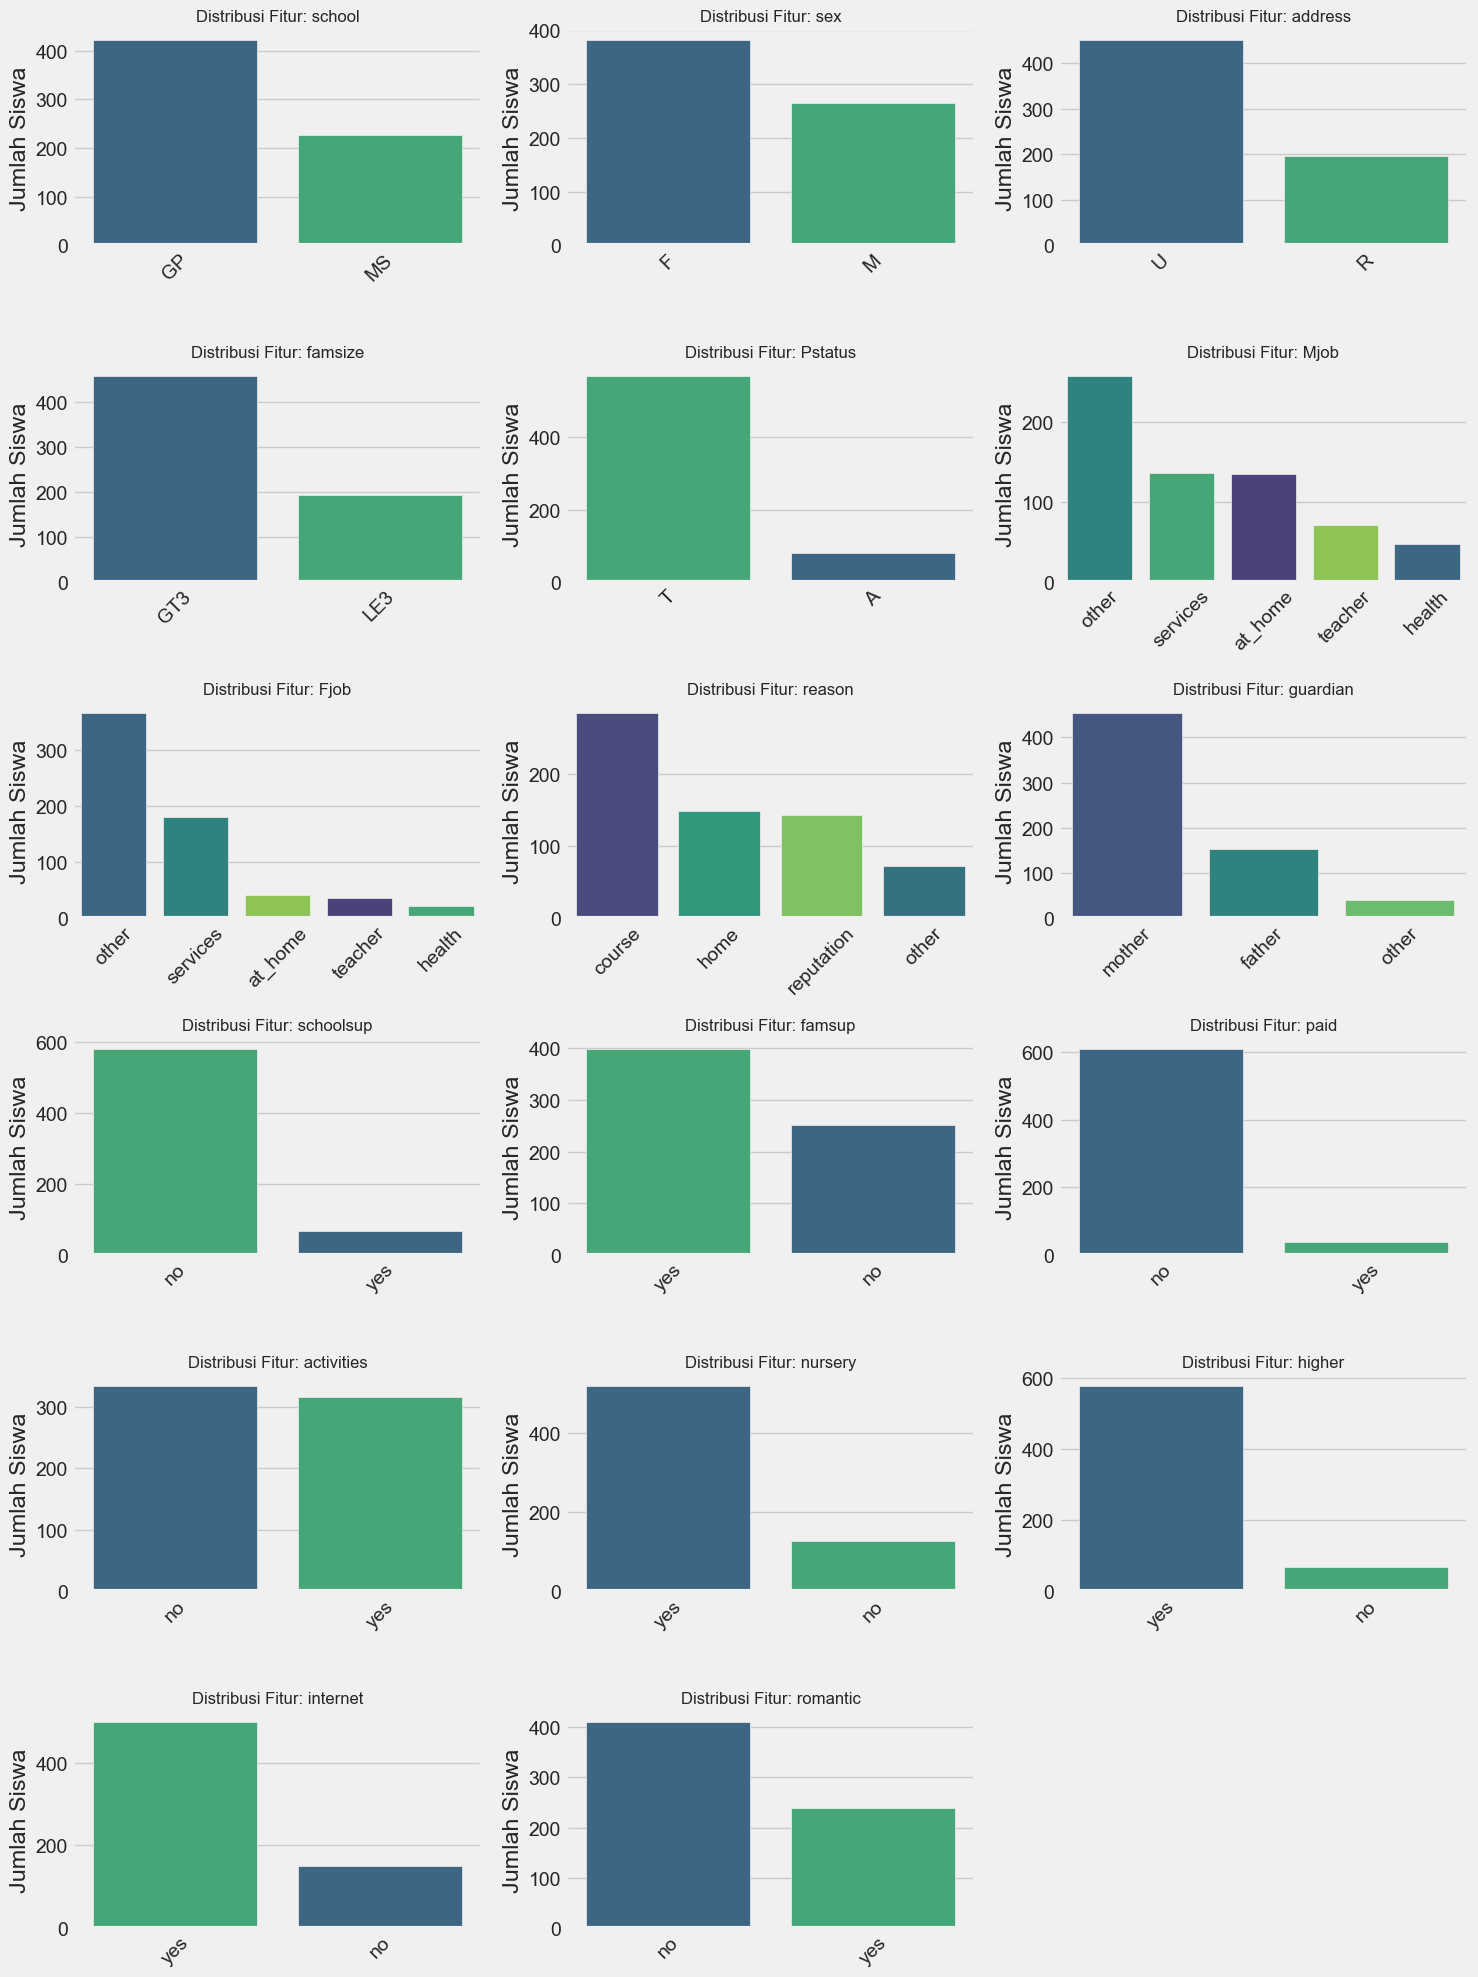

In [50]:
# Daftar fitur kategorikal
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                        'nursery', 'higher', 'internet', 'romantic']

# Membuat grid plot
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 3, i + 1)
    sns.countplot(
        x=df[feature],
        hue=df[feature],             
        palette='viridis',
        order=df[feature].value_counts().index,
        legend=False               
    )
    plt.title(f'Distribusi Fitur: {feature}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Jumlah Siswa')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Struktur Dataset

In [51]:
df.shape

(649, 33)

Terdapat 649 baris dan 33 fitur

In [52]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Berikut adalah rincian dari setiap kolom (fitur) yang ada di dalam dataset:

#### A. Atribut Demografis & Sekolah
* **`school`**: Sekolah siswa (tipe: biner).
    * `'GP'`: Gabriel Pereira
    * `'MS'`: Mousinho da Silveira
* **`sex`**: Jenis kelamin siswa (tipe: biner).
    * `'F'`: Female (Perempuan)
    * `'M'`: Male (Laki-laki)
* **`age`**: Usia siswa (tipe: numerik, rentang 15-22).
* **`address`**: Tipe alamat rumah (tipe: biner).
    * `'U'`: Urban (Perkotaan)
    * `'R'`: Rural (Pedesaan)

#### B. Atribut Latar Belakang Keluarga
* **`famsize`**: Ukuran keluarga (tipe: biner).
    * `'LE3'`: Keluarga dengan jumlah anggota $\le$ 3
    * `'GT3'`: Keluarga dengan jumlah anggota > 3
* **`Pstatus`**: Status kohabitasi orang tua (tipe: biner).
    * `'T'`: Together (Tinggal bersama)
    * `'A'`: Apart (Berpisah)
* **`Medu`**: Tingkat pendidikan Ibu (tipe: numerik ordinal, skala 0-4).
* **`Fedu`**: Tingkat pendidikan Ayah (tipe: numerik ordinal, skala 0-4).
* **`Mjob`**, **`Fjob`**: Pekerjaan Ibu dan Ayah (tipe: nominal).
* **`guardian`**: Wali siswa (tipe: nominal).

#### C. Atribut Kebiasaan Belajar & Dukungan
* **`traveltime`**: Waktu tempuh ke sekolah (tipe: numerik ordinal, skala 1-4).
* **`studytime`**: Waktu belajar mingguan (tipe: numerik ordinal, skala 1-4).
* **`failures`**: Jumlah kegagalan di kelas sebelumnya (tipe: numerik).
* **`schoolsup`**, **`famsup`**, **`paid`**, **`activities`**, **`nursery`**, **`higher`**: Atribut dukungan dan aktivitas (tipe: biner `yes`/`no`).

#### D. Atribut Gaya Hidup & Sosial
* **`internet`**, **`romantic`**: Status internet dan hubungan romantis (tipe: biner `yes`/`no`).
* **`famrel`**, **`freetime`**, **`goout`**, **`Dalc`**, **`Walc`**, **`health`**: Atribut gaya hidup (tipe: numerik ordinal, skala 1-5).

#### E. Atribut Akademis (Target & Nilai)
* **`absences`**: Jumlah absensi sekolah (tipe: numerik).
* **`G1`**: Nilai periode pertama (tipe: numerik, rentang 0-20).
* **`G2`**: Nilai periode kedua (tipe: numerik, rentang 0-20).
* **`G3`**: Nilai akhir tahun (tipe: numerik, rentang 0-20). **(TARGET UTAMA)**

## Identifikasi Kualitas Dataset

### Pemerikasaan Missing Value

In [53]:
# Menghitung jumlah missing values di setiap kolom
missing_values = df.isnull().sum()

print("Jumlah Missing Values per Kolom:")
# Menampilkan hanya kolom yang punya missing value
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\nKesimpulan: Tidak ada missing values dalam dataset ini.")

Jumlah Missing Values per Kolom:
Series([], dtype: int64)

Kesimpulan: Tidak ada missing values dalam dataset ini.


### Pemeriksaan Duplikasi

In [54]:
# Menghitung jumlah baris yang terduplikasi sepenuhnya
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat saat ini: {duplicate_rows}")

if duplicate_rows == 0:
    print("Kesimpulan: Tidak ada lagi baris yang terduplikasi secara penuh.")

Jumlah baris duplikat saat ini: 0
Kesimpulan: Tidak ada lagi baris yang terduplikasi secara penuh.


### Pemeriksaan Outliers

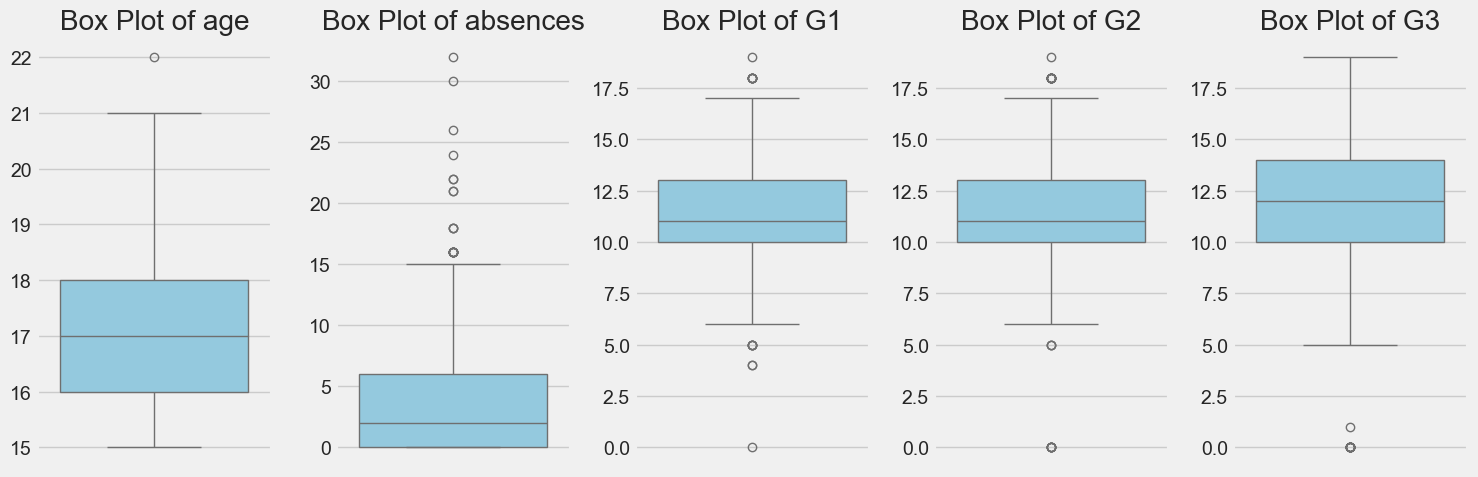

In [55]:
# Kolom numerik yang akan diperiksa
numerical_features = ['age', 'absences', 'G1', 'G2', 'G3']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel('')
    plt.tight_layout()
plt.show()

# Preprocessing Data

Tahap Preprocessing atau Data Preparation adalah salah satu langkah paling krusial dalam siklus machine learning. Tujuannya adalah membersihkan dan mengubah data mentah menjadi format yang bersih, terstruktur, dan sesuai untuk dimasukkan ke dalam model. Tanpa pra-pemrosesan yang baik, performa model bisa menjadi tidak akurat atau bias.

Pada tahap ini, kita akan melakukan dua kegiatan utama: Transformasi Data dan Normalisasi/Skala.

In [56]:
# Asumsi 'df' adalah DataFrame yang sudah bersih dari duplikasi dari tahap sebelumnya
# Salin dataframe untuk menjaga data asli
df_processed = df.copy()

## Transformasi Data

### A. Membuat Variabel Target (Dependent Variable)
Tujuan kita adalah klasifikasi biner ("Lulus" / "Gagal"). Kita perlu membuat kolom target ini dari kolom G3 yang bersifat numerik. Sesuai definisi sebelumnya, siswa dianggap "Lulus" jika G3 >= 10.

In [57]:
# Membuat kolom 'status' berdasarkan nilai G3
# 'Lulus' jika G3 >= 10, sebaliknya 'Gagal'
df_processed['status'] = np.where(df_processed['G3'] >= 10, 'Lulus', 'Gagal')

# Mengubah target menjadi numerik untuk beberapa model (1 untuk Lulus, 0 untuk Gagal)
df_processed['status_binary'] = df_processed['status'].map(
    {'Lulus': 1, 'Gagal': 0})


# Menampilkan hasil transformasi
print("Contoh hasil pembuatan kolom target:")
display(df_processed[['G3', 'status', 'status_binary']].head())

# Melihat distribusi target
print("\nDistribusi kelas target:")
print(df_processed['status'].value_counts())

Contoh hasil pembuatan kolom target:


,G3,status,status_binary
0,11,Lulus,1
1,11,Lulus,1
2,12,Lulus,1
3,14,Lulus,1
4,13,Lulus,1



Distribusi kelas target:
status
Lulus    549
Gagal    100
Name: count, dtype: int64


### B. Mengubah Fitur Kategorikal menjadi Numerik (Encoding)
Model machine learning tidak dapat memproses data teks. Oleh karena itu, semua fitur kategorikal harus diubah menjadi angka. Ada dua pendekatan utama yang akan kita gunakan:

- Label Encoding/Mapping: Untuk fitur biner (hanya memiliki 2 kategori), kita bisa memetakannya ke 0 dan 1.
- One-Hot Encoding: Untuk fitur nominal (memiliki >2 kategori tanpa urutan), kita membuat kolom baru untuk setiap kategori.


In [58]:
# --- 1. Encoding Fitur Biner (Mapping) ---
# Daftar fitur biner 'yes'/'no'
binary_map_cols = ['schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in binary_map_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# Mapping manual untuk fitur biner lainnya
df_processed['sex'] = df_processed['sex'].map({'F': 1, 'M': 0})
df_processed['address'] = df_processed['address'].map({'U': 1, 'R': 0})
df_processed['famsize'] = df_processed['famsize'].map({'GT3': 1, 'LE3': 0})
df_processed['Pstatus'] = df_processed['Pstatus'].map({'T': 1, 'A': 0})
df_processed['school'] = df_processed['school'].map({'GP': 1, 'MS': 0})


# --- 2. One-Hot Encoding untuk Fitur Nominal ---
# Daftar fitur nominal dengan lebih dari 2 kategori
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

# Menerapkan one-hot encoding
df_processed = pd.get_dummies(
    df_processed, columns=nominal_cols, drop_first=True)

print("Dataset setelah encoding:")
display(df_processed.head())

Dataset setelah encoding:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,1,1,17,1,1,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,1,1,15,1,0,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,1,1,15,1,1,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,1,1,16,1,1,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False


### C. Memilih Fitur dan Target Final (Feature Selection)
Sekarang kita akan memisahkan dataset menjadi himpunan fitur (X) dan target (y). Pada langkah ini, kita juga akan membuang kolom-kolom yang tidak diperlukan lagi.

- `G1`, `G2`, `G3`: Dibuang karena sangat berkorelasi dengan target dan menyebabkan kebocoran data (data leakage). Kita ingin memprediksi hasil akhir sebelum nilai-nilai ini diketahui.
  
- `status`: Kolom target versi teks, kita akan menggunakan `status_binary`.

In [60]:
# Memisahkan fitur (X) dan target (y)
X = df_processed.drop(columns=['G1', 'G2', 'G3', 'status', 'status_binary'],inplace=False)
y = df_processed['status_binary']

print("Bentuk matriks fitur (X):", X.shape)
print("Bentuk vektor target (y):", y.shape)

Bentuk matriks fitur (X): (649, 39)
Bentuk vektor target (y): (649,)


## Normalisasi

Beberapa algoritma machine learning (seperti SVM, Regresi Logistik, KNN) sangat sensitif terhadap skala fitur. Fitur dengan rentang nilai yang besar (misalnya absences) dapat mendominasi fitur dengan rentang kecil (misalnya studytime), yang dapat mengganggu proses pembelajaran model.

Untuk mengatasi ini, kita perlu menyamakan skala semua fitur numerik. Kita akan menggunakan `StandardScaler`

In [61]:
from sklearn.preprocessing import StandardScaler

# Kita akan membuat salinan baru dari X untuk perbandingan
X_standard_scaled = X.copy()

# Mengidentifikasi kolom numerik yang perlu diskalakan (sama seperti sebelumnya)
numerical_cols_to_scale = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Inisialisasi scaler
standard_scaler = StandardScaler()

# Terapkan scaler HANYA pada kolom numerik yang telah diidentifikasi
X_standard_scaled[numerical_cols_to_scale] = standard_scaler.fit_transform(
    X_standard_scaled[numerical_cols_to_scale])

print("Lima baris pertama dari data fitur (X) setelah standardisasi Z-Score:")
display(X_standard_scaled.head())

print("\nRingkasan statistik setelah standardisasi (perhatikan nilai 'mean' dan 'std'):")
# Tampilkan statistik untuk verifikasi
# Mean akan sangat mendekati 0, dan Std Dev akan sangat mendekati 1
display(X_standard_scaled[numerical_cols_to_scale].describe().transpose())

Lima baris pertama dari data fitur (X) setelah standardisasi Z-Score:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,1,1.031695,1,1,0,1.310216,1.540715,0.576718,0.083653,...,False,False,False,False,True,False,False,False,True,False
1,1,1,0.210137,1,1,1,-1.336039,-1.188832,-0.760032,0.083653,...,False,False,True,False,False,False,False,False,False,False
2,1,1,-1.432980,1,0,1,-1.336039,-1.188832,-0.760032,0.083653,...,False,False,True,False,False,False,True,False,True,False
3,1,1,-1.432980,1,1,1,1.310216,-0.278983,-0.760032,1.290114,...,False,False,False,True,False,True,False,False,True,False
4,1,1,-0.611422,1,1,1,0.428131,0.630866,-0.760032,0.083653,...,False,False,True,False,False,True,False,False,False,False



Ringkasan statistik setelah standardisasi (perhatikan nilai 'mean' dan 'std'):


,count,mean,std,min,25%,50%,75%,max
age,649.0,-1.751723e-16,1.000771,-1.432980,-0.611422,0.210137,1.031695,4.317929
Medu,649.0,-1.094827e-16,1.000771,-2.218124,-0.453954,-0.453954,1.310216,1.310216
Fedu,649.0,-3.284481e-17,1.000771,-2.098682,-1.188832,-0.278983,0.630866,1.540715
traveltime,649.0,-7.663789e-17,1.000771,-0.760032,-0.760032,-0.760032,0.576718,3.250218
studytime,649.0,9.579736e-17,1.000771,-1.122808,-1.122808,0.083653,0.083653,2.496576
failures,649.0,3.284481e-17,1.000771,-0.374305,-0.374305,-0.374305,-0.374305,4.686612
famrel,649.0,-1.628555e-16,1.000771,-3.068820,0.072606,0.072606,1.119748,1.119748
freetime,649.0,1.861206e-16,1.000771,-2.075896,-0.171647,-0.171647,0.780478,1.732603
goout,649.0,7.116376e-17,1.000771,-1.859711,-1.008546,-0.157380,0.693785,1.544950
Dalc,649.0,-3.284481e-17,1.000771,-0.543555,-0.543555,-0.543555,0.538553,3.784879
